# FEA
<br>
<br>
<br>

In [3]:
import genysis
token = "REPLACE_WITH_YOUR_TOKEN"

### FEA example1 : simple bar object

In [4]:
# upload and visualize the geometry to run FEA on
genysis.upload('models/bar.obj','bar.obj',token) # a simple 100*10*10 bar geometry
genysis.visualize(['bar.obj'],token,True)

('uploading file size:', 0.0, 'MB')
[==============================================================================================================================================]284%
successfully uploaded models/bar.obj as bar.obj
https://studiobitonti.appspot.com/apps/visualize?name=bar.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=bar.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [5]:
f = genysis.fea()
# set the geometry to run fea on
f.setVolume('bar.obj')
# set the prefix of output files
f.setOutput('bar')
# set the material properties
f.setMaterial(elastic_modulus = 100,poisson_ratio = 0.4)
# set the detail level of remeshing algorithm that turning the triangle-surface-mesh into volumetric-tetrahedron-mesh  
f.setRemesh(
    detail='low'  # 'low' 'normal' 'high', default is 'normal'
)

# add a load region
f.addLoad(
    condition="x <= 10", # a pythonic expression describing the load region
    load={"x": 0,"y": 0,"z": 10} # the load vector which will be applied distributedly to this region
)

# add a support region
f.addSupport(
    condition="x >= 90",  # a pythonic expression describing the support region
    axis={"x": True,"y": True,"z": True} # choose which axises to be constrained for this support node set
)

# kick-start the fea solver
f.run(token)

# two .frd and .inp files will be generated if the FEA was successful 
# .frd is the FEA result file while .inp is the input file of Calculix for reproduction and debuging purposes 
genysis.download('bar.frd','models/bar.frd',token)


('request: ', '{"input": ["bar.obj"], "setting": {"load_conditions": [{"load": {"y": 0, "x": 0, "z": 10}, "type": "cload", "condition": "x <= 10"}], "remesh": {"detail": "low", "fast": false}, "material": {"elastic_modulus": 100, "poisson_ratio": 0.4}, "output": "bar", "input": "bar.obj", "support_conditions": [{"condition": "x >= 90", "axis": {"y": true, "x": true, "z": true}}]}, "t": "REPLACE_WITH_YOUR_TOKEN", "output": "bar"}')
('response: ', u'["bar.inp","bar.frd"]\n')
[==================================================]100%
successfully downloaded to models/bar.frd


### Viewing the FEA result with Calculix
Genysis uses open-source FEA solver Calculix as backend. Currently it needs to be installed to view the result. 

We are also developing our own viewer which will be released in near future

For windows users, bconverged provides a handy installer
http://www.bconverged.com/data/content/CalculiX_2_10_win_002.zip

Installation for other platforms and further details please refer to http://www.calculix.de/


For unit conversion please refer to http://web.mit.edu/calculix_v2.7/CalculiX/ccx_2.7/doc/ccx/node4.html

<br>

#### After installing calculix, you will be able to open .frd files and use its GUI to visualize the FEA results:

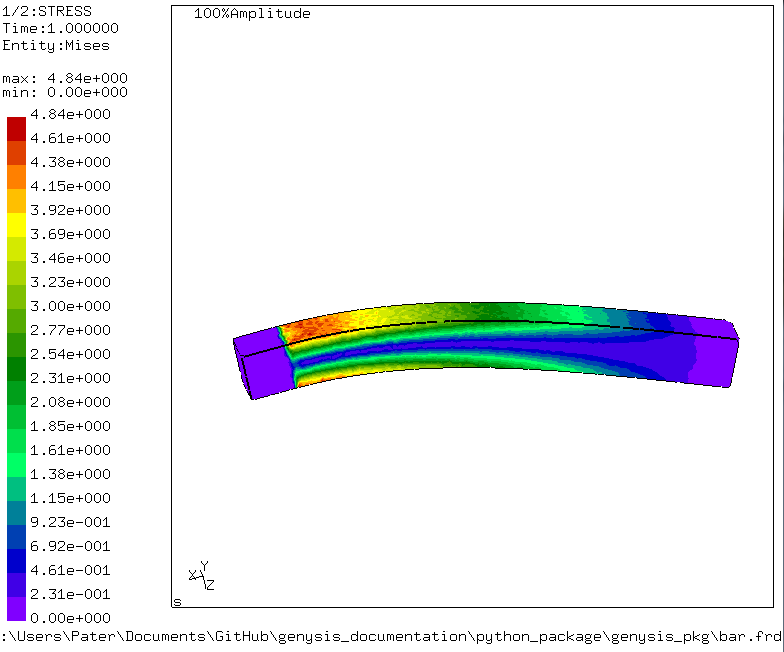

## FEA example2 : Lattice Geometry

In [6]:
# upload and visualize the geometry to run FEA on
genysis.upload('models/lattice_x.obj','lattice_x.obj',token) # the lattice file to run FEA on
genysis.upload('models/load.obj','load.obj',token) # geometry that defines load region
genysis.upload('models/support.obj','support.obj',token) # geometry that defines support region
genysis.visualize(['lattice_x.obj','load.obj','support.obj'],token,True)

('uploading file size:', 1.969, 'MB')
[==================================================]100%
successfully uploaded models/lattice_x.obj as lattice_x.obj
('uploading file size:', 0.0, 'MB')
[================================================================================================================]224%
successfully uploaded models/load.obj as load.obj
('uploading file size:', 0.0, 'MB')
[==============================================================================================================]221%
successfully uploaded models/support.obj as support.obj
https://studiobitonti.appspot.com/apps/visualize?name=lattice_x.obj,load.obj,support.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=lattice_x.obj,load.obj,support.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [7]:
f = genysis.fea()
f.setVolume('lattice_x.obj')
f.setOutput('lattice_x')
f.setMaterial(elastic_modulus = 100,poisson_ratio = 0.4)
# add a load region
f.addLoad(
    file='load.obj', # use an uploaded obj file to define load region
    load={"x": 5,"y": 5,"z": 0}
)
# add a support region
f.addSupport(
    file='support.obj', # use an uploaded obj file to define support region
    axis={"x": True,"y": True,"z": True}
)

# run the fea solver
f.run(token)
genysis.download('lattice_x.frd','models/lattice_x.frd',token)

('request: ', '{"input": ["lattice_x.obj", "load.obj", "support.obj"], "setting": {"load_conditions": [{"load": {"y": 5, "x": 5, "z": 0}, "type": "cload", "condition": {"file": "load.obj"}}], "remesh": {"detail": "normal", "fast": false}, "material": {"elastic_modulus": 100, "poisson_ratio": 0.4}, "output": "lattice_x", "input": "lattice_x.obj", "support_conditions": [{"condition": {"file": "support.obj"}, "axis": {"y": true, "x": true, "z": true}}]}, "t": "REPLACE_WITH_YOUR_TOKEN", "output": "lattice_x"}')
('response: ', u'["lattice_x.inp","lattice_x.frd"]\n')
[==================================================]100%
successfully downloaded to models/lattice_x.frd


### Result viewed by Caculix
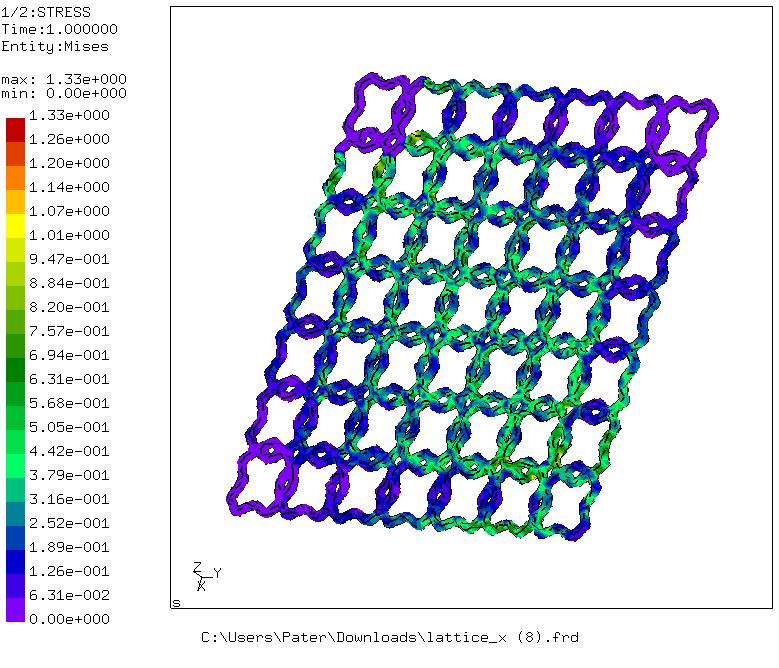